# Lensing a flat map

In [1]:
using CMBLensing

First we load a simulated unlensed field, $f$, and lensing potential, $\phi$,

In [2]:
@unpack f,ϕ = load_sim_dataset(
    θpix  = 2,       # size of the pixels in arcmin
    Nside = 256,     # number of pixels per side in the map
    T     = Float32, # Float32 or Float64 (former is ~twice as fast)
    use   = :I       # :I for Intensity, :P for polarization, or :IP for both
);

We can lense the map with LenseFlow,

In [3]:
f̃ = LenseFlow(ϕ) * f;

And flip between lensed and unlensed maps,

In [4]:
animate([f,f̃], interval=500)

HTML{String}("<video width=\"560\" height=\"400\" controls autoplay loop>\n  <source type=\"video/mp4\" src=\"data:video/mp4;base64,AAAAHGZ0eXBNNFYgAAACAGlzb21pc28yYXZjMQAAAAhmcmVlAACyB21kYXQAAAKuBgX//6rcRem9\n5tlIt5Ys2CDZI+7veDI2NCAtIGNvcmUgMTU1IHIyOTE3IDBhODRkOTggLSBILjI2NC9NUEVHLTQg\nQVZDIGNvZGVjIC0gQ29weWxlZnQgMjAwMy0yMDE4IC0gaHR0cDovL3d3dy52aWRlb2xhbi5vcmcv\neDI2NC5odG1sIC0gb3B0aW9uczogY2FiYWM9MSByZWY9MyBkZWJsb2NrPTE6MDowIGFuYWx5c2U9\nMHgzOjB4MTEzIG1lPWhleCBzdWJtZT03IHBzeT0xIHBzeV9yZD0xLjAwOjAuMDAgbWl4ZWRfcmVm\nPTEgbWVfcmFuZ2U9MTYgY2hyb21hX21lPTEgdHJlbGxpcz0xIDh4OGRjdD0xIGNxbT0wIGRlYWR6\nb25lPTIxLDExIGZhc3RfcHNraXA9MSBjaHJvbWFfcXBfb2Zmc2V0PS0yIHRocmVhZHM9MTIgbG9v\na2FoZWFkX3RocmVhZHM9MiBzbGljZWRfdGhyZWFkcz0wIG5yPTAgZGVjaW1hdGU9MSBpbnRlcmxh\nY2VkPTAgYmx1cmF5X2NvbXBhdD0wIGNvbnN0cmFpbmVkX2ludHJhPTAgYmZyYW1lcz0zIGJfcHly\nYW1pZD0yIGJfYWRhcHQ9MSBiX2JpYXM9MCBkaXJlY3Q9MSB3ZWlnaHRiPTEgb3Blbl9nb3A9MCB3\nZWlnaHRwPTIga2V5aW50PTI1MCBrZXlpbnRfbWluPTIgc2NlbmVjdXQ9NDAgaW50cmFfcmVmcmVz\naD0wIHJjX2xvb2thaGVhZD00MCByYz1jcmYgbWJ0cmVlPTEgY3JmPTIzLjAgcWNvbXA9MC42MCBx\ncG1pbj0wIHFwbWF4PTY5IHFwc3RlcD00IGlwX3JhdGlvPTEuNDAgYXE9MToxLjAwAIAAAJSaZYiE\nABT//vfHT8Cm6Plmy51FPSEwitj6SCpV/4SvUIgDlCXPdISb2ioRzyH98XQfynaCDh8So5Leh8Zc\ng0Kx1AN2PTeTZ2+EsEV1L7u6Z8H7KHPP+uJFSIfFD/mMBvOJGTgDMyOuffW4U9hwjLr4ok1BW1ff\nQ+PoXdy7ZPoxfyU0ICpLwrWqiF0rB7mXqGs7IEZeI2rtazbbEwJQ0m2ApjJu+e6BRuK2nOyMao1T\nkm0l19qIYBgSZQqqcAZb52LPKVHDUnG6QgmQ1hjob9XfhBTwk2HtzXBZsUaxRt9u2jNfkBI0/QJk\nZakSFxHUoFtMR0vasRXKmhYnQ7/JFXJ1qeEYUSArXPn4x28SdumfkAfp+ufEQPuFYWWiYMDu7oN8\nXp/KW+DyS+MeQPynt5/mYEFTXbvEGyc+3NR+vy8veiwBiBUhaYdO47FyhJwAAVn26ZwYMfIFaiwg\nKQrQcN+X2snnHOF3PoVQ1+1xQc/X7cn5Bb+fRqXD5E+Z12u4c2ROWUcSj/fy5d8dX277andKBiF5\nifm1ypr80k43KaSi+ChSik3Fk6VUEhZ0zEHWR4TH35KS02SbMu1J9/a1XXgTTKnro/zLo09e+U2s\n/9PUD67pCUTyMkiV1hWYQmOSsz9dgtlEW4TpNsH5CIh/uLu/wLKCGOVi2FV/K3xK0gl0+WoU3wQz\nmJwJyWgVknvskUwJfTrZ96yhDwDUbojDcM6weiKPtvyX4dpXdCuHAFVRukg7zLmGabzkbgVSq6qn\ne1QPncxOErRPH/J+xAv9OVs1jw54saffuZo9tQCkxtZ+IP8wKajqr1G0Wjca8iA33a4n7hzTRRSU\n+HpSTUcT/ozbaFNVA0/Z58YPsi9ALqs3hsVX8nNrPmzlqH546U4LIBE9prquayhJZToPGCQzCvgq\nCGqyvXp1erp0obDHdx7ZriOWVidgjpVXmWgs82eBCKx7RRLz6rV9sqwArfY8ncThrmss5Wyyi1ma\n2zJPLhg7lgU4+h7rvcurmeUJhwPmavykD348B0UJNsgpX7IH+/P6jEwfvVMkIO6VVBJV+0g8/l9T\n/VdOVkeMQs36xdQDoV9zF4WgQR8EvQFtKLgTyGJgSjXuX84N6uxIor0PrIdAF4G/BhDwoNx27/v9\nCDdRCdIyiwxx/fJtKx8dWdnn4SU8i1JS6S4GmajkfdcBICKke6wIAjMOpduZU0BLDaf5oGGK5m1w\ntnlULnwuGOe8oGmcZ3fv4wHAR5+EjsBT5iRETUj+TWMxGRN52GzDI8YntIZIK/c9Uhx4cwxYoUT/\n5Mvi7UqKz8bEHt/4S59nKiz0y9nUXYOFDg/Bhy02h/oXyDSF0VUl5T6NKSH+zx0KM5K3j9Z4f8K5\n1vGYpZ+7frOCrCYzFI9z60Kk0fhqsKmzwgj8+wpCWR4GTpNKqW8irtJzdzeyW5hXxpdN65Zd9zo7\nIrtFczZJrZQ9JbRu2gvyq/2L5KNFugiWptd2TZQPfvyqcp7dzqz5be9QFfy02h8NJOCBGWWrt0zo\nyF7JAPJbVQznAmCUDPt2VaxHhmQMhjBI6UwvAV2U3+1P8jXHE0z3sjT4HIfN3msBk842sfLxD6vM\nlFM+AnjVhjG2rMvjbgZgg/yq3Xe7Uletio8Cc5hbQyyEtOv8hqWJxL9JQqiq5vUq+P2N5LPjiXqT\n8/GbhveBN9Tdqps+6Obl+MPfM5hjZDNfmfV8LCqTOVeJIorsUmyjD+1WYB3pPL/zgocijNI7adj3\nM+E65EjOoq/I6FODZCSFrNjDbt0viellnq2xv35qJlMkU+y3JJ+0iWNhtET1fs6/QVbBgQLKOpIH\nScXShOsnsSndXWg35H0NtfHKYvWtxW/mA4wd/3ou2VKT491Z3EhHiPSu1EMADfxh5xInhEnrwybu\nKbolbqBW+/ypqekwRM8ZRlxFor/6fT3z4CQRT5uekPR16T3BRfO46rnOMnCya+4OOqSPBx3sq0NT\n5X6H+mWQYH8IeIByYhnzmpSluCIwTqYMpOC1tBXe8Ulry5+qJcODV07HR66LV0DUNMrW3qxXdjyr\nDwFTmftvCsm9hf5da3YI2T88zu/x5cGPjPHJtpkWmpp/3XEyNNK45nlPgz5TNAg7W8qwES28Tzax\nPTaKpkFDJ1EaUrPb0b+ASeeLmCukQS/hDL30+UTiH5I1S4Ykk54/mxulz924TKCCMHtm2nyDUhug\nRbozAaLa+vXceMRkQkMERkK3bjbGaLImfeL42u96iJ2XtbX5fSeMqk7Voo8VnOzzaXOM/i9c/mk6\n3PDaPVcwKTESJMtCuUYCMf5t4fGXcS/dnBDfW6aBEzU8S8Iml6vniDpmkpRubQkU/XzUjScdmhqe\nVuZYVrQxFIWz3/wD6zU1tO6dTPsByrC06PW5Mh5A/lbWWlNSmtbTzNMtp/g9vqkLFOgjzEo6Puph\nTF69MAcHslAI/GMncCshq4UqqVUgJMkBPZZpjoFPg3tYHrnATSoFJmXzt0bJGGd5G8R5LiNn4UpK\nd7rK7gHcvQB209MTuuRS+6otpWXSiuyPoJwhKVPIethTrcC4+ZWp534G8waDJ7mXzPBOu8pE1HDN\n5Jf/f4CZPvYb7BbTRdm0hQwCV9yDHhW/EBJInXeZoLWBui1rm2BrKQEZDIN+Yl1ORXDFNF1vZI4N\nXvFUZGyHPNwXZvvxfiitquQzgY3Fjk5OHf6J6fOrBrm93poqa04+199r/FLqQ9y6aCDuzhnAtkPq\nvdRGHswv+if7rxT0EViUt5AoRsS02Zr4KtGUZNAsSwRzd3

The difference between lensed and unlensed,

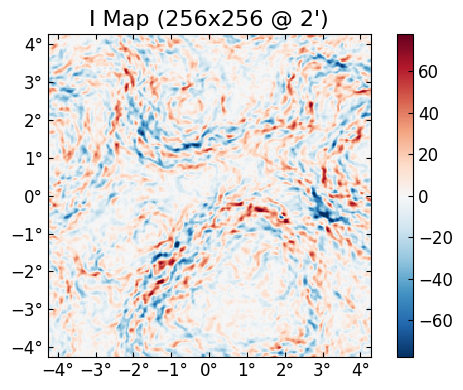

In [5]:
plot(f-f̃);

## Loading your own data

CMBLensing flat-sky `Field` objects like `f` or `ϕ`  are just thin wrappers around arrays. You can get the underlying data arrays for $I(\mathbf{x})$, $Q(\mathbf{x})$, and $U(\mathbf{x})$ with `f[:Ix]`, `f[:Qx]`, and `f[:Ux]` respectively, or the Fourier coefficients, $I(\mathbf{l})$, $Q(\mathbf{l})$, and $U(\mathbf{l})$ with `f[:Il]`, `f[:Ql]`, and `f[:Ul]`,

In [6]:
mapdata = f[:Ix]

256×256 Array{Float32,2}:
  64.2791   55.2669   58.0685   66.9672  …   42.6668   50.974    63.7438
  58.8753   64.3192   69.2355   67.9249      47.2811   43.9675   50.903 
  47.9415   62.8338   67.1773   57.8098      65.6617   46.3922   38.789 
  40.8003   57.5675   61.4263   50.4418      84.1808   52.8753   33.9909
  33.4472   52.4513   59.2947   52.7618      87.2596   49.8912   27.2819
  35.319    54.0066   62.3652   58.3315  …   93.3228   53.7185   30.3909
  48.9978   58.9065   64.0997   59.6179     112.934    77.6224   52.8075
  57.4568   56.8943   60.5485   60.3225     129.566   101.24     73.6986
  55.8345   51.0549   61.0484   75.1528     137.261   110.493    79.123 
  60.5948   53.9406   68.8473  100.948      141.285   116.737    84.4385
  80.784    74.1863   88.2169  129.771   …  141.638   123.761    98.0308
 103.625   101.867   117.409   158.377      141.797   130.164   113.088 
 120.499   122.144   137.715   173.097      140.859   138.814   128.592 
   ⋮                     

If you have your own map data in an array you'd like to load into a CMBLensing `Field` object, you can construct it as follows:

In [7]:
FlatMap(mapdata, θpix=3)

65536-element FlatMap{256×256 map, 3′ pixels, fourier∂, Array{Float32}}:
  64.2791  
  58.875256
  47.94148 
  40.80034 
  33.447178
  35.31899 
  48.99784 
  57.45679 
  55.83453 
  60.594822
  80.78398 
 103.624504
 120.49947 
   ⋮       
 163.88123 
 158.65012 
 167.22845 
 173.80888 
 163.56894 
 137.0829  
 105.96126 
  76.66639 
  54.657322
  44.843227
  47.696434
  59.58931 

For more info on `Field` objects, see [Field Basics](../05_field_basics/).

## Inverse lensing

You can inverse lense a map with the `\` operator (which does `A \ b ≡ inv(A) * b`):

In [8]:
LenseFlow(ϕ) \ f;

Note that this is true inverse lensing, rather than lensing by the negative deflection (which is often called "anti-lensing"). This means that lensing then inverse lensing a map should get us back the original map. Lets check that this is the case:

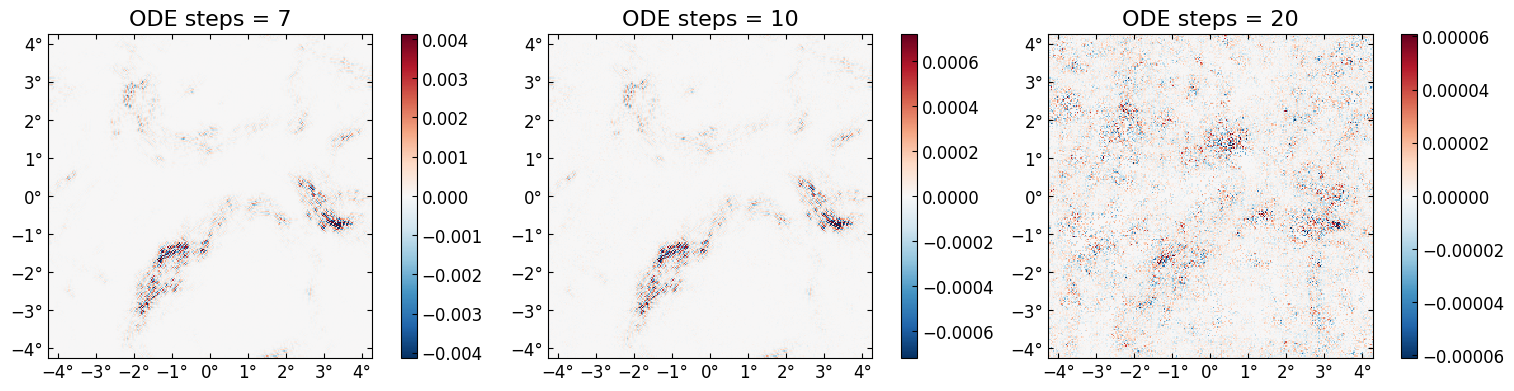

In [9]:
Ns = [7 10 20]
plot([f - (LenseFlow(ϕ,N) \ (LenseFlow(ϕ,N) * f)) for N in Ns],
    title=["ODE steps = $N" for N in Ns]);

A cool feature of LenseFlow is that inverse lensing is trivially done by running the LenseFlow ODE in reverse. Note that as we crank up the number of ODE steps above, we recover the original map to higher and higher precision.

## Other lensing algorithms

We can also lense via:
* `PowerLens`: the standard Taylor series expansion to any order:
$$ f(x+\nabla x) \approx f(x) + (\nabla f)(\nabla \phi) + \frac{1}{2} (\nabla \nabla f) (\nabla \phi)^2 + ... $$

* `TayLens` ([Næss&Louis 2013](https://arxiv.org/abs/1307.0719)): like `PowerLens`, but first a nearest-pixel permute step, then a Taylor expansion around the now-smaller residual displacement

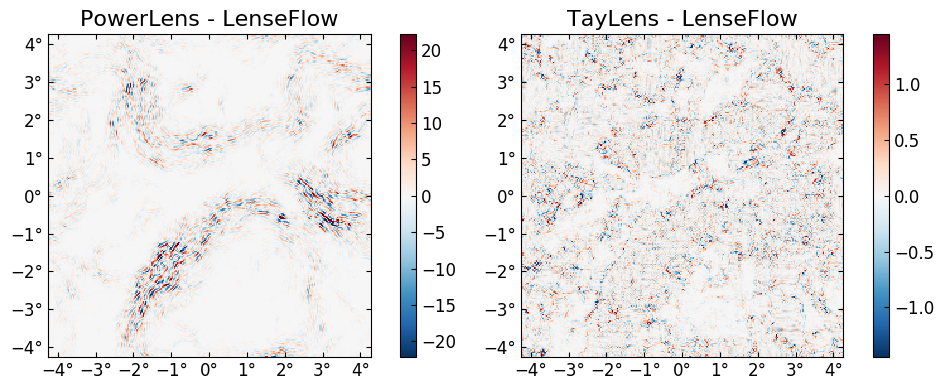

In [10]:
plot([(PowerLens(ϕ,2)*f - f̃) (Taylens(ϕ,2)*f - f̃)], 
    title=["PowerLens - LenseFlow" "TayLens - LenseFlow"]);

## Benchmarking

LenseFlow is highly optimized code since it appears on the inner-most loop of our analysis algorithms. To benchmark LenseFlow, note that there is first a precomputation step, which caches some data in preparation for applying it to a field of a given type. This was done automatically when evaluating `LenseFlow(ϕ) * f` but we can benchmark it separately since in many cases this only needs to be done once for a given $\phi$, e.g. when Wiener filtering at fixed $\phi$,

In [11]:
using BenchmarkTools

In [12]:
@benchmark cache(LenseFlow(ϕ),f)

BenchmarkTools.Trial: 
  memory estimate:  91.09 MiB
  allocs estimate:  1749
  --------------
  minimum time:     27.816 ms (30.10% GC)
  median time:      126.418 ms (84.52% GC)
  mean time:        96.728 ms (76.24% GC)
  maximum time:     176.518 ms (81.41% GC)
  --------------
  samples:          53
  evals/sample:     1

Once cached, it's very fast and memory non-intensive to repeatedly apply the operator:

In [13]:
@benchmark Lϕ * f setup=(Lϕ=cache(LenseFlow(ϕ),f))

BenchmarkTools.Trial: 
  memory estimate:  2.01 MiB
  allocs estimate:  279
  --------------
  minimum time:     15.270 ms (0.00% GC)
  median time:      16.037 ms (0.00% GC)
  mean time:        21.644 ms (25.05% GC)
  maximum time:     143.934 ms (86.79% GC)
  --------------
  samples:          44
  evals/sample:     1